# 项目：心血管疾病数据集

## 简介

该数据集包含心血管疾病数据，由70000条患者数据和多个相关特征组成，可以被用于探索不同特征对心血管疾病的影响。

变量含义：
- `id`：身份证号码
- `age`：年龄，以天为单位
- `gender`：性别，1-女性，2-男性
- `height`：身高，厘米
- `weight`：体重，公斤
- `ap_hi`：收缩压
- `ap_lo`：舒张压
- `cholesterol`：胆固醇，1:正常，2:高于正常，3:远高于正常
- `gluc`：胶质，1:正常，2:高于正常，3:远高于正常
- `smoke`：病人是否吸烟
- `alco`：病人是否喝酒
- `active`：是否身体运动
- `cardio`：是否存在心血管疾病

## **读取数据**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data = pd.read_csv("./cardio.csv")

In [3]:
original_data.head()

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0


## **评估和清理数据**

In [4]:
cleaned_data = original_data.copy()

In [5]:
# 使用分号 ';' 将数据拆分为多列
cleaned_data = cleaned_data['id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio'].str.split(';', expand=True)

# 给新拆分的列赋予正确的列名
cleaned_data.columns = ['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

# 如果有需要，将某些列转换为数值类型
cleaned_data = cleaned_data.apply(pd.to_numeric, errors='ignore')

In [9]:
# 显示处理后的数据
cleaned_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


`gender`, `cholesterol`, `gluc`, `smoke`, `alco`, `active`, `cardio`列是分类型数据，

In [11]:
cleaned_data['gender'] = cleaned_data['gender'].astype('category')
cleaned_data['cholesterol'] = cleaned_data['cholesterol'].astype('category')
cleaned_data['gluc'] = cleaned_data['gluc'].astype('category')
cleaned_data['smoke'] = cleaned_data['smoke'].astype('category')
cleaned_data['alco'] = cleaned_data['alco'].astype('category')
cleaned_data['active'] = cleaned_data['active'].astype('category')
cleaned_data['cardio'] = cleaned_data['cardio'].astype('category')

In [12]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           70000 non-null  int64   
 1   age          70000 non-null  int64   
 2   gender       70000 non-null  category
 3   height       70000 non-null  int64   
 4   weight       70000 non-null  float64 
 5   ap_hi        70000 non-null  int64   
 6   ap_lo        70000 non-null  int64   
 7   cholesterol  70000 non-null  category
 8   gluc         70000 non-null  category
 9   smoke        70000 non-null  category
 10  alco         70000 non-null  category
 11  active       70000 non-null  category
 12  cardio       70000 non-null  category
dtypes: category(7), float64(1), int64(5)
memory usage: 3.7 MB


In [13]:
cleaned_data.describe()

,id,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,164.359229,74.205690,128.817286,96.630414
std,28851.302323,2467.251667,8.210126,14.395757,154.011419,188.472530
min,0.000000,10798.000000,55.000000,10.000000,-150.000000,-70.000000
25%,25006.750000,17664.000000,159.000000,65.000000,120.000000,80.000000
50%,50001.500000,19703.000000,165.000000,72.000000,120.000000,80.000000
75%,74889.250000,21327.000000,170.000000,82.000000,140.000000,90.000000
max,99999.000000,23713.000000,250.000000,200.000000,16020.000000,11000.000000


In [14]:
# 删除收缩压 (ap_hi) 和舒张压 (ap_lo) 为负值的行
cleaned_data = cleaned_data[(cleaned_data['ap_hi'] >= 0) & (cleaned_data['ap_lo'] >= 0)]

In [15]:
cleaned_data.describe()

,id,age,height,weight,ap_hi,ap_lo
count,69992.000000,69992.000000,69992.000000,69992.000000,69992.000000,69992.000000
mean,49973.395702,19468.869056,164.359384,74.206485,128.843868,96.634601
std,28851.700988,2467.087019,8.210423,14.395726,153.999302,188.482151
min,0.000000,10798.000000,55.000000,10.000000,1.000000,0.000000
25%,25006.750000,17664.000000,159.000000,65.000000,120.000000,80.000000
50%,50003.000000,19703.000000,165.000000,72.000000,120.000000,80.000000
75%,74890.250000,21327.000000,170.000000,82.000000,140.000000,90.000000
max,99999.000000,23713.000000,250.000000,200.000000,16020.000000,11000.000000


## **数据分析**

可以计算各个特征与 cardio（心血管疾病的标签）之间的相关性。

In [16]:
# 计算相关性矩阵
correlation = cleaned_data.corr()

# 查看cardio与其他特征的相关性
correlation['cardio'].sort_values(ascending=False)

cardio         1.000000
age            0.238189
cholesterol    0.221165
weight         0.181705
gluc           0.089313
ap_lo          0.065732
ap_hi          0.054482
gender         0.008110
id             0.003760
alco          -0.007331
height        -0.010867
smoke         -0.015487
active        -0.035658
Name: cardio, dtype: float64

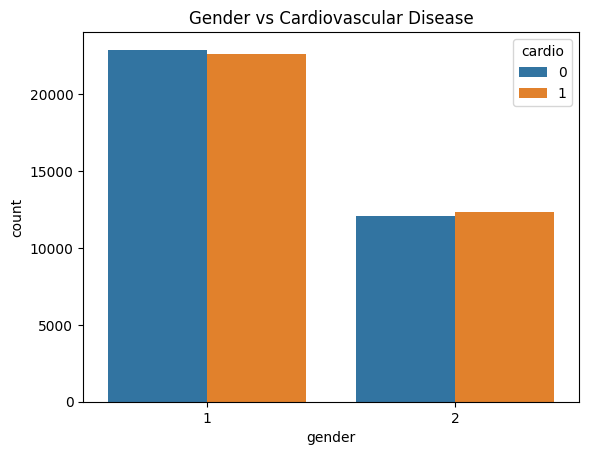

In [17]:
# 性别与心血管疾病的关系
sns.countplot(x='gender', hue='cardio', data=cleaned_data)
plt.title('Gender vs Cardiovascular Disease')
plt.show()

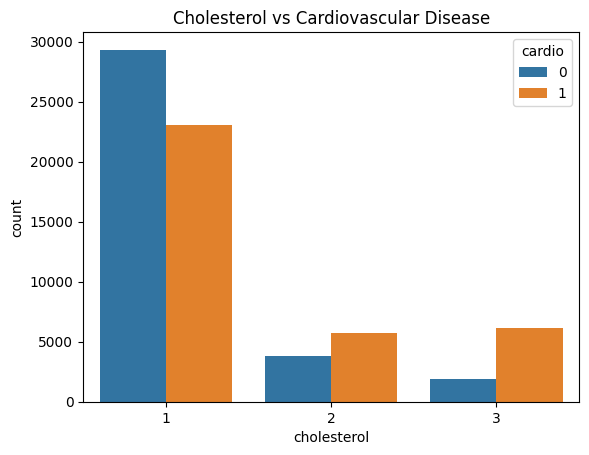

In [18]:
# 胆固醇与心血管疾病的关系
sns.countplot(x='cholesterol', hue='cardio', data=cleaned_data)
plt.title('Cholesterol vs Cardiovascular Disease')
plt.show()

C:\Users\123\AppData\Local\Temp\ipykernel_11516\3157634026.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['age_years'] = cleaned_data['age'] // 365


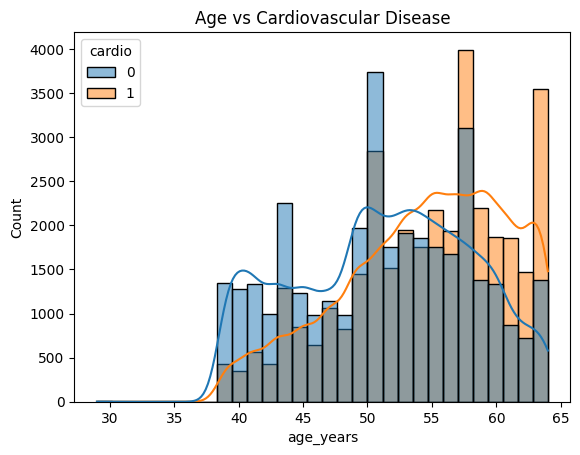

In [19]:
# 年龄与心血管疾病的关系

# 将年龄从天转换为年
cleaned_data['age_years'] = cleaned_data['age'] // 365

# 绘制年龄与心血管疾病的关系
sns.histplot(data=cleaned_data, x='age_years', hue='cardio', bins=30, kde=True)
plt.title('Age vs Cardiovascular Disease')
plt.show()